In [1]:
# Import modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the dataset

df = pd.DataFrame(pd.read_csv("../assets/normalized_pyramid_data.csv"))

In [3]:
# Get the rows that contain the reigns of the individual rulers

start_reign = df["start_of_reign"].notnull()
end_reign = df["end_of_reign"].notnull()
reign_df = df[start_reign & end_reign]

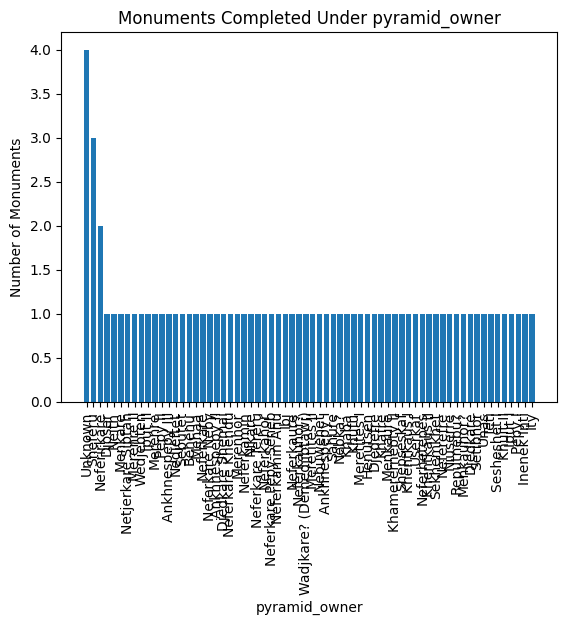

In [5]:
# Plot the number of monuments that were built during the reign of each pyramid_owner in a bar graph

monuments = df['pyramid_owner'].value_counts()
pyramid_owners = df['pyramid_owner'].value_counts().keys()

plt.title("Monuments Completed Under pyramid_owner")
plt.xlabel("pyramid_owner")
plt.ylabel("Number of Monuments")
plt.bar(pyramid_owners, monuments)
plt.xticks(rotation=90)
plt.show()

In [8]:
# Plot the average width of the monuments in each Dynasty
# Messy elements are not considered here for the sake of simplicity in this inital exploration,
# they would need to be properly handled in an actual analysis

'''
dynasty_df = df[['dynasty', 'width']]
dynasty_df.dropna(inplace=True)
invalid_widths = dynasty_df['width'].str.contains(' ', na=False)
dynasty_df = dynasty_df[~invalid_widths]
dynasty_df['width'] = dynasty_df['width'].astype('float64')
dynasty_group = dynasty_df.groupby('dynasty').mean().plot.bar()
'''

# This needs to be modified because it relied on the old data

"\ndynasty_df = df[['dynasty', 'width']]\ndynasty_df.dropna(inplace=True)\ninvalid_widths = dynasty_df['width'].str.contains(' ', na=False)\ndynasty_df = dynasty_df[~invalid_widths]\ndynasty_df['width'] = dynasty_df['width'].astype('float64')\ndynasty_group = dynasty_df.groupby('dynasty').mean().plot.bar()\n"

In [10]:
# Same as above but reveals more information (ie better)

'''
sns.color_palette(palette='colorblind')
dyn_pal = {'3': 'plum', '4': 'g', '5': 'orange', '6': 'b', '7': 'r', '8': 'skyblue', 'FIP or 8': 'pink'}
plot = sns.boxplot(x='dynasty', y='width', data=dynasty_df, palette=dyn_pal)
plot.set_title("Average Width of Pyramids During Each Dynasty")
plot.set_xlabel("Dynasty")
plot.set_ylabel("Width")
'''

# Same as above

'\nsns.color_palette(palette=\'colorblind\')\ndyn_pal = {\'3\': \'plum\', \'4\': \'g\', \'5\': \'orange\', \'6\': \'b\', \'7\': \'r\', \'8\': \'skyblue\', \'FIP or 8\': \'pink\'}\nplot = sns.boxplot(x=\'dynasty\', y=\'width\', data=dynasty_df, palette=dyn_pal)\nplot.set_title("Average Width of Pyramids During Each Dynasty")\nplot.set_xlabel("Dynasty")\nplot.set_ylabel("Width")\n'

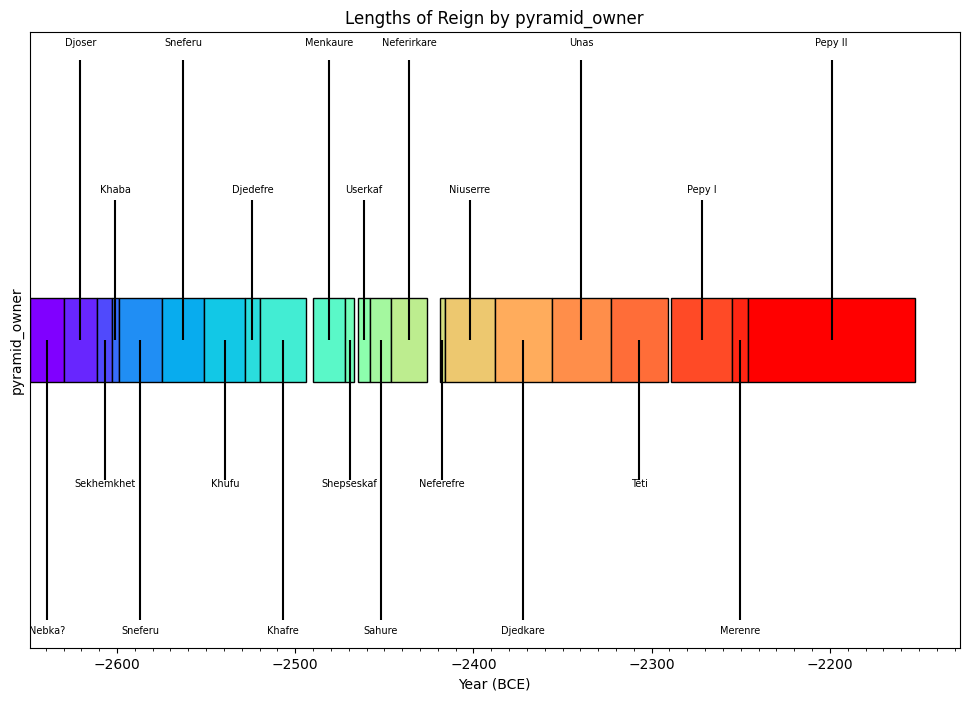

In [12]:
# Testing a timeline plot
#plt.style.use('ggplot')
from matplotlib.pyplot import cm
import numpy as np

tl = df.sort_values(by='start_of_reign', ascending=False)

tl = tl[['pyramid_owner', 'start_of_reign', 'end_of_reign', 'length_of_reign']].dropna()
pyramid_owners = tl['pyramid_owner']
starts = -tl['start_of_reign']
ends = -tl['end_of_reign']
length = tl['length_of_reign']

# Figure
plt.figure(figsize=(12, 8))
color = cm.rainbow(np.linspace(0, 1, len(starts)))
plt.barh(y=0, 
         width=(ends - starts), 
         height=0.3, 
         left=starts, 
         color=color, 
         edgecolor='black')
# Tick settings
plt.tick_params(left=False, labelleft=False)
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(10))
# Labeling
plt.xlabel('Year (BCE)')
plt.ylabel('pyramid_owner')
plt.title('Lengths of Reign by pyramid_owner')
# Vertical figure label lines
levels = np.tile([-2, 2, -1, 1], 
                 int(np.ceil(len(pyramid_owners) / 4)))[:len(pyramid_owners)]
plt.vlines(starts + length/2, 0, levels/2, color='black')
# Figure label text
for i in range(len(starts)):
    plt.text(starts.iloc[i] + length.iloc[i]/2, 
             (levels[i]*1.05)/2, 
             pyramid_owners.iloc[i], 
             ha='center', 
             fontsize = '7') 

### Thoughts on above

- It might be worth considering if another graph (line graph?) could be overlayed atop something more or less like this. For example, this + a line graph of the height or mass of the pyramids over time.

### Issues

- I can't figure out how to reduce the length of the vertical label lines without ruining the proportion of the figure, 
and vice versa.

- Rainbow colors probably aren't the best for visual clarity. Each segment should have more contrast with respect to those on either side.